In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
seoul = pd.read_csv("seoul_moves.csv", encoding = 'cp949')
print(seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25 non-null     int64 
 1   자치구         25 non-null     object
 2   승차          25 non-null     int64 
 3   하차          25 non-null     int64 
 4   승하차         25 non-null     int64 
 5   13시         25 non-null     int64 
 6   14시         25 non-null     int64 
 7   15시         25 non-null     int64 
 8   16시         25 non-null     int64 
 9   시간대합산노인인구   25 non-null     int64 
 10  노인인구        25 non-null     object
 11  양로시설수       25 non-null     int64 
 12  양로시설정원      25 non-null     int64 
 13  양로시설현원      25 non-null     int64 
 14  양로시설종사자수    25 non-null     int64 
 15  요양시설수       25 non-null     int64 
 16  요양시설정원      25 non-null     object
 17  요양시설현원      25 non-null     int64 
 18  요양시설종사자수    25 non-null     int64 
 19  노인복지시설수     25 non-null     int64 
 20  노인복지종사자수    

In [19]:
seoul = seoul.drop('양로시설정원', axis=1)
seoul = seoul.drop('양로시설종사자수', axis=1)
seoul = seoul.drop('요양시설정원', axis=1)
seoul = seoul.drop('요양시설종사자수', axis=1)
seoul = seoul.drop('노인복지종사자수', axis=1)
seoul = seoul.drop('노인일자리종사자수', axis=1)
seoul = seoul.drop('Unnamed: 0', axis=1)

print(seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자치구        25 non-null     object
 1   승차         25 non-null     int64 
 2   하차         25 non-null     int64 
 3   승하차        25 non-null     int64 
 4   13시        25 non-null     int64 
 5   14시        25 non-null     int64 
 6   15시        25 non-null     int64 
 7   16시        25 non-null     int64 
 8   시간대합산노인인구  25 non-null     int64 
 9   노인인구       25 non-null     object
 10  양로시설수      25 non-null     int64 
 11  양로시설현원     25 non-null     int64 
 12  요양시설수      25 non-null     int64 
 13  요양시설현원     25 non-null     int64 
 14  노인복지시설수    25 non-null     int64 
 15  경로당        25 non-null     int64 
 16  노인교실       25 non-null     int64 
 17  노인일자리시설수   25 non-null     int64 
dtypes: int64(16), object(2)
memory usage: 3.6+ KB
None


In [20]:
seoul.apply(pd.to_numeric, errors = 'coerce')
seoul['노인인구'] = pd.to_numeric(seoul['노인인구'].str.replace(',',''))
print(seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자치구        25 non-null     object
 1   승차         25 non-null     int64 
 2   하차         25 non-null     int64 
 3   승하차        25 non-null     int64 
 4   13시        25 non-null     int64 
 5   14시        25 non-null     int64 
 6   15시        25 non-null     int64 
 7   16시        25 non-null     int64 
 8   시간대합산노인인구  25 non-null     int64 
 9   노인인구       25 non-null     int64 
 10  양로시설수      25 non-null     int64 
 11  양로시설현원     25 non-null     int64 
 12  요양시설수      25 non-null     int64 
 13  요양시설현원     25 non-null     int64 
 14  노인복지시설수    25 non-null     int64 
 15  경로당        25 non-null     int64 
 16  노인교실       25 non-null     int64 
 17  노인일자리시설수   25 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 3.6+ KB
None


In [21]:
# encording
from sklearn import preprocessing

def encode_seoul(seoul):
    features = ['자치구']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(seoul[feature])
        seoul[feature] = le.transform(seoul[feature])

    return seoul

In [22]:
seoul = encode_seoul(seoul)
print(seoul.info())
# 데이터 셋이 모두 숫자형태로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   자치구        25 non-null     int64
 1   승차         25 non-null     int64
 2   하차         25 non-null     int64
 3   승하차        25 non-null     int64
 4   13시        25 non-null     int64
 5   14시        25 non-null     int64
 6   15시        25 non-null     int64
 7   16시        25 non-null     int64
 8   시간대합산노인인구  25 non-null     int64
 9   노인인구       25 non-null     int64
 10  양로시설수      25 non-null     int64
 11  양로시설현원     25 non-null     int64
 12  요양시설수      25 non-null     int64
 13  요양시설현원     25 non-null     int64
 14  노인복지시설수    25 non-null     int64
 15  경로당        25 non-null     int64
 16  노인교실       25 non-null     int64
 17  노인일자리시설수   25 non-null     int64
dtypes: int64(18)
memory usage: 3.6 KB
None


In [23]:
# 데이터 셋의 상관관계 파악
seoul.corr()

,자치구,승차,하차,승하차,13시,14시,15시,16시,시간대합산노인인구,노인인구,양로시설수,양로시설현원,요양시설수,요양시설현원,노인복지시설수,경로당,노인교실,노인일자리시설수
자치구,1.000000,0.102571,0.129016,0.117427,-0.196963,-0.109838,-0.068422,-0.004594,-0.096295,-0.334093,-0.208830,-0.261161,-0.164105,-0.039495,0.167351,-0.217354,-0.158140,-0.308854
승차,0.102571,1.000000,0.924139,0.982596,0.582834,0.670090,0.748915,0.783605,0.708342,0.021356,0.126391,0.042464,-0.207015,-0.203389,0.017020,-0.082574,-0.091290,0.014436
하차,0.129016,0.924139,1.000000,0.979025,0.571480,0.670932,0.740909,0.776012,0.701757,-0.025840,0.073948,0.011346,-0.326546,-0.274442,0.033642,-0.072671,-0.134204,0.052145
승하차,0.117427,0.982596,0.979025,1.000000,0.588667,0.683552,0.759611,0.795178,0.718938,-0.001175,0.103355,0.028161,-0.269164,-0.241897,0.025433,-0.079367,-0.113933,0.033051
13시,-0.196963,0.582834,0.571480,0.588667,1.000000,0.976443,0.933125,0.890214,0.965754,0.629847,0.019976,-0.116579,-0.088904,-0.015414,0.217585,0.479911,0.271845,0.216714
14시,-0.109838,0.670090,0.670932,0.683552,0.976443,1.000000,0.985563,0.961059,0.997287,0.495025,-0.020162,-0.113867,-0.182111,-0.132197,0.158875,0.386958,0.218644,0.188637
15시,-0.068422,0.748915,0.740909,0.759611,0.933125,0.985563,1.000000,0.990396,0.993854,0.367564,-0.019274,-0.096495,-0.231036,-0.220812,0.103347,0.280404,0.168478,0.173588
16시,-0.004594,0.783605,0.776012,0.795178,0.890214,0.961059,0.990396,1.000000,0.976754,0.299174,-0.042673,-0.123572,-0.266731,-0.252550,0.058689,0.225056,0.161778,0.167074
시간대합산노인인구,-0.096295,0.708342,0.701757,0.718938,0.965754,0.997287,0.993854,0.976754,1.000000,0.454798,-0.015905,-0.114363,-0.195783,-0.158394,0.136680,0.348419,0.208300,0.189472
노인인구,-0.334093,0.021356,-0.025840,-0.001175,0.629847,0.495025,0.367564,0.299174,0.454798,1.000000,0.143983,-0.130135,0.427493,0.566562,0.329083,0.762641,0.461838,0.356781


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [29]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

<Axes: >

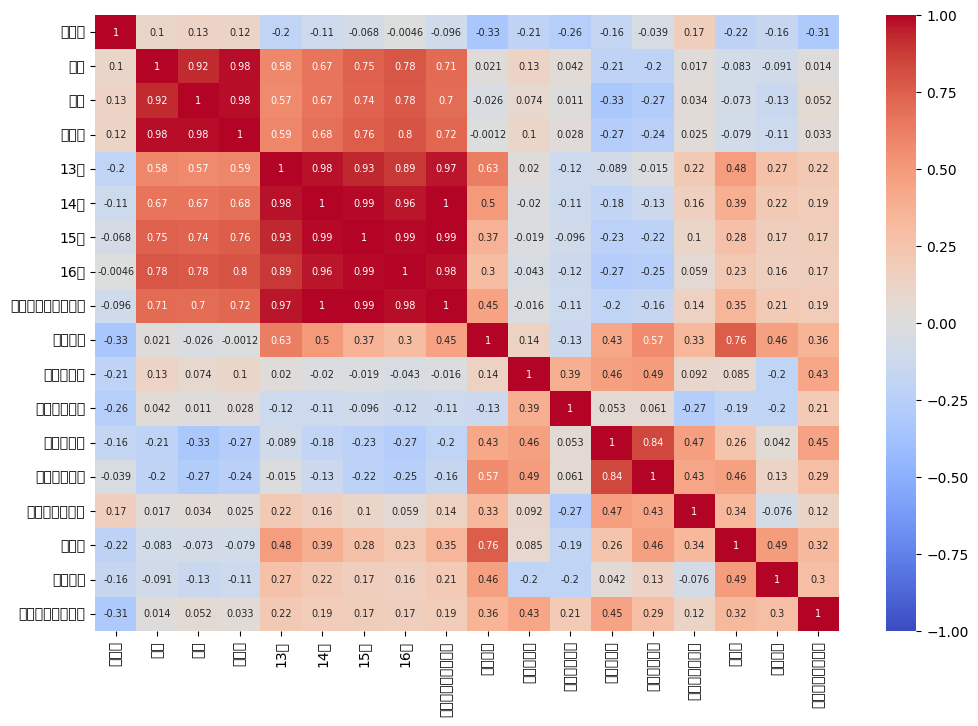

In [30]:
plt.figure(figsize=(12, 8))
corr = seoul.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, annot_kws={'size':7})

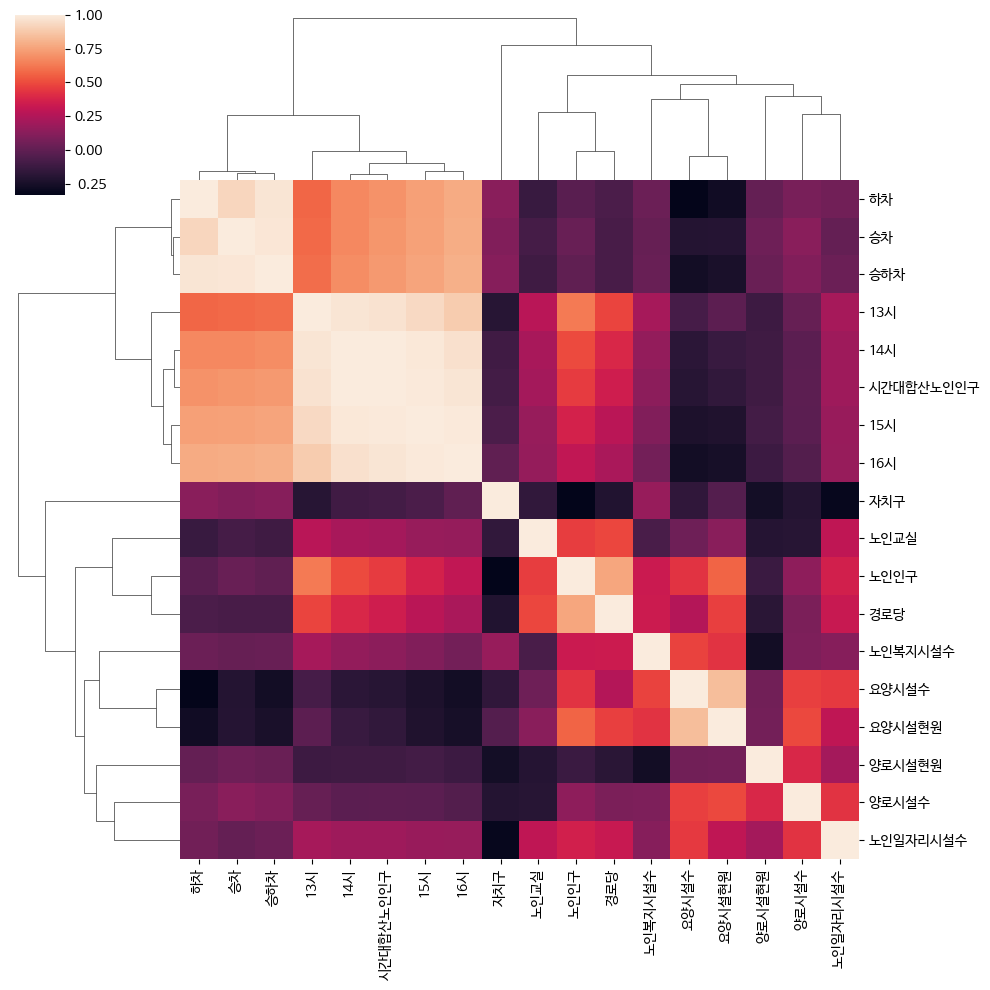

In [ ]:
# 클러스터는 서로 유사한 것들을 묶어줌
sns.clustermap(seoul.corr())

In [ ]:
# 상관관계 높은 순으로 나열
seoul.corr()['자치구'].sort_values(ascending=False)

자치구          1.000000
노인복지시설수      0.167351
하차           0.129016
승하차          0.117427
승차           0.102571
16시         -0.004594
요양시설현원      -0.039495
15시         -0.068422
시간대합산노인인구   -0.096295
14시         -0.109838
노인교실        -0.158140
요양시설수       -0.164105
13시         -0.196963
양로시설수       -0.208830
경로당         -0.217354
양로시설현원      -0.261161
노인일자리시설수    -0.308854
노인인구        -0.334093
Name: 자치구, dtype: float64

In [ ]:
import plotly.express as px

seoul_plt = px.scatter(seoul, x="자치구", y="노인인구", trendline="lowess", trendline_options=dict(frac=0.666))
seoul_plt.show()

In [ ]:
seoul_plt = px.scatter(seoul, x="자치구", y="승하차", trendline="lowess", trendline_options=dict(frac=0.666))
seoul_plt.show()

In [ ]:
seoul_plt = px.scatter(seoul, x="자치구", y="경로당", trendline="lowess", trendline_options=dict(frac=0.666))
seoul_plt.show()

In [ ]:
seoul_plt = px.scatter(seoul, x="자치구", y="노인교실", trendline="lowess", trendline_options=dict(frac=0.666))
seoul_plt.show()

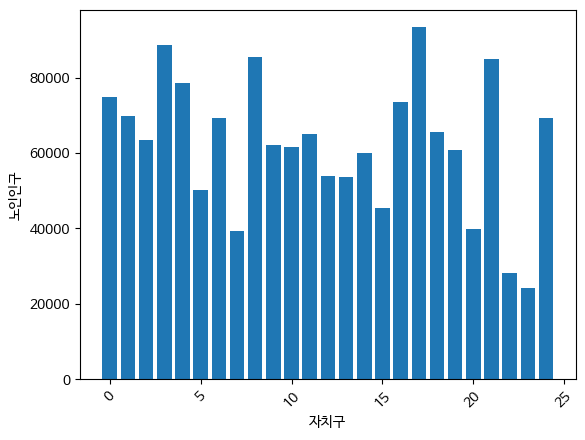

In [ ]:
plt.xlabel('자치구')
plt.ylabel('노인인구')
plt.bar(seoul['자치구'],seoul['노인인구'])
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=45)
plt.show()

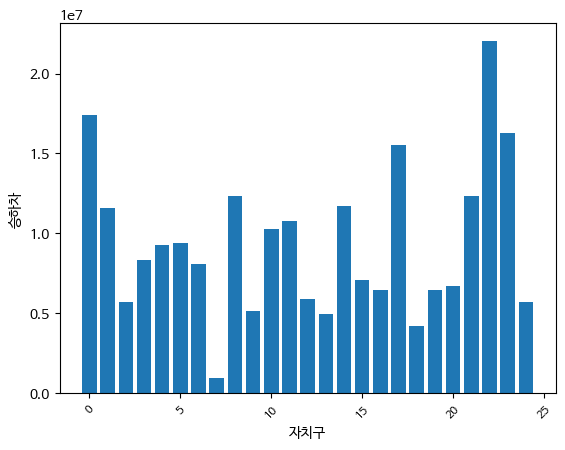

In [ ]:
plt.xlabel('자치구')
plt.ylabel('승하차')
plt.bar(seoul['자치구'],seoul['승하차'])
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=45)
plt.show()

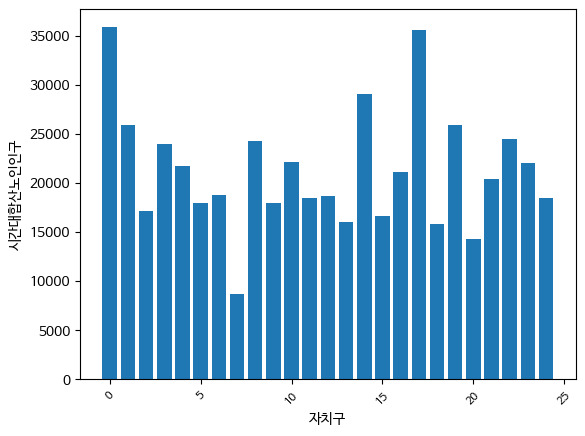

In [ ]:
plt.xlabel('자치구')
plt.ylabel('시간대합산노인인구')
plt.bar(seoul['자치구'],seoul['시간대합산노인인구'])
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=45)
plt.show()

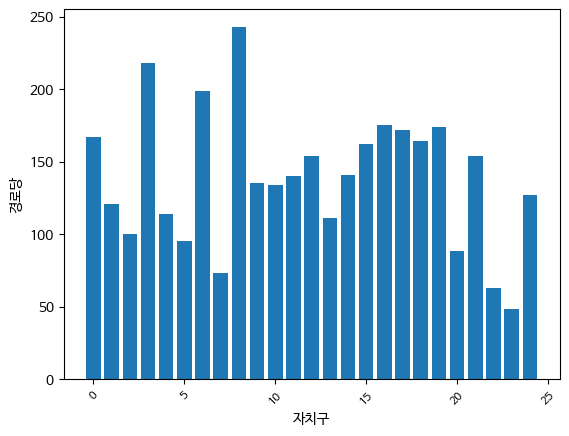

In [ ]:
plt.xlabel('자치구')
plt.ylabel('경로당')
plt.bar(seoul['자치구'],seoul['경로당'])
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=45)
plt.show()

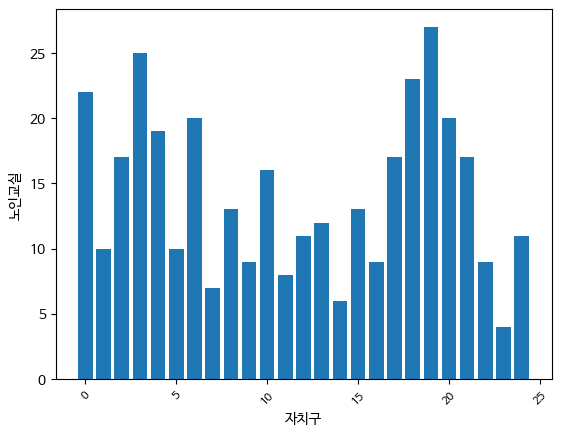

In [ ]:
plt.xlabel('자치구')
plt.ylabel('노인교실')
plt.bar(seoul['자치구'],seoul['노인교실'])
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np

w = 0.15
nrow = seoul.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

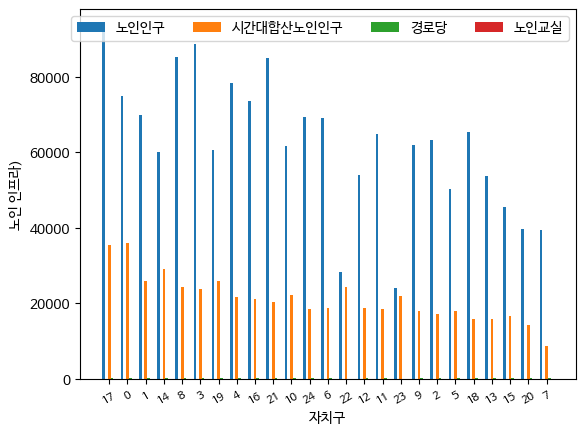

In [ ]:
plt.xlabel('자치구')
plt.ylabel('노인 인프라)')
plt.bar(idx - 2 * w, seoul['노인인구'], width = w, label = '노인인구')
#plt.bar(idx - w, seoul['승하차'], width = w, label = '승하차')
plt.bar(idx, seoul['시간대합산노인인구'], width = w, label = '시간대합산노인인구')
plt.bar(idx + w, seoul['경로당'], width = w, label = '경로당')
plt.bar(idx + 2 * w, seoul['노인교실'], width = w, label = '노인교실')
plt.xticks(idx, seoul['자치구'], rotation = 30)
plt.legend(ncol = 5)
plt.show()